In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib

plt.style.use('../kyle.mplstyle')

GRAYCOLOR=GREYCOLOR='#AA9999'

def single_wide(height=3.5):
    fig, ax = plt.subplots(1,1,figsize=(37/6,height))
    return fig, [ax]
    
def double_wide(height=3, labels=["a)","b)"]):
    _ = plt.subplots(1,2,figsize=(37/6,height))
    for l,ax in zip(labels,_[1]):
        ax.text(0.05, 0.95, l, va='top', ha='left', transform=ax.transAxes )
    return _

def triple_wide(height=2.5, labels=["a)","b)","c)"]):
    _ = plt.subplots(1,3,figsize=(37/6,height))
    for l,ax in zip(labels,_[1]):
        ax.text(0.05, 0.95, l, va='top', ha='left', transform=ax.transAxes )
    return _

def six_plots(height=5.0, labels=["a)","b)","c)","d)","e)","f)"]):
    _ = plt.subplots(2,3,figsize=(37/6,height))
    for l,ax in zip(labels,_[1].flatten()):
        ax.text(0.05, 0.95, l, va='top', ha='left', transform=ax.transAxes )
    return _



def publish_figure(name='figure.pdf'):
    import subprocess
    import os
    fname=f"figs/{name}"
    os.makedirs("./figs", exist_ok=True)
    fig.savefig(fname)
    subprocess.run(['git','add', fname], capture_output=True)
    subprocess.run(['git','commit','-m','updated'], capture_output=True)
    subprocess.run(['git','push','origin','main'], capture_output=True)
    print(f"https://github.com/millskyle/phd_thesis/raw/main/methods/{fname}")

https://github.com/millskyle/phd_thesis/raw/main/methods/figs/example_functions.pdf


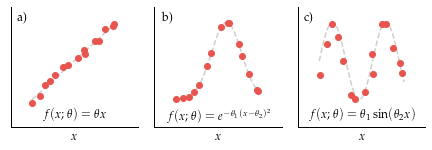

In [9]:
fig, ax = triple_wide(height=2.25)

np.random.seed(0)
N=15

x = np.linspace(0,1,num=N)+(np.random.rand(N)-0.5)*0.1
_x = np.linspace(0,1,N*4)

def ex1(x):
    return x

def ex2(x):
    return np.exp(-16.*(x-0.6)**2)

def ex3(x):
    return 0.5*(np.sin(x*10) + 1)

y1 = ex1(x)+(np.random.rand(N)-0.5)*0.1
y2 = ex2(x)
y3 = ex3(y1)


ax[0].plot(_x, ex1(_x), '--', color=GRAYCOLOR, alpha=0.5 )
ax[1].plot(_x, ex2(_x), '--', color=GRAYCOLOR, alpha=0.5 )
ax[2].plot(_x, ex3(_x), '--', color=GRAYCOLOR, alpha=0.5 )

ax[0].plot(x, y1, 'o')
ax[1].plot(x, y2, 'o')
ax[2].plot(x, y3, 'o')

ax[0].text(0.5,0.1,"$f(x; \\theta)=\\theta x$", va='center',ha='center', transform=ax[0].transAxes)
ax[1].text(0.5,0.1,"$f(x; \\theta)= e^{-\\theta_1(x-\\theta_2)^2}$", va='center',ha='center', transform=ax[1].transAxes)
ax[2].text(0.5,0.1,"$f(x; \\theta)= \\theta_1 \sin(\\theta_2 x) $", va='center',ha='center', transform=ax[2].transAxes)


#ax[0].set_ylabel("$f(x)$")
for a in ax:
    a.set_xlabel("$x$")
    a.set_xticks([])
    a.set_yticks([])
    a.set_xlim([-0.25,1.25])
    a.set_ylim([-0.35,1.2])
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    
publish_figure("example_functions.pdf")


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/intro_neuralnet.pdf


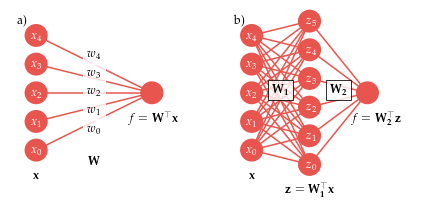

In [10]:
fig, axs = double_wide(labels=["a)","b)"])



#Single-layer model:
ax = axs[0]
p = []

for i in range(5):
    p.append(matplotlib.patches.Circle((0,i), 0.4))
    p.append(matplotlib.lines.Line2D((0,4),(i,2)))
    ax.text(0,i,f"$x_{{{i}}}$",ha='center',va='center',color='white' )
    ax.text(2, 0.75+i*0.65, s=f"$w_{{{i}}}$", ha='center',va='center', bbox=dict(edgecolor='white', facecolor='white', alpha=0.8))
    
p.append(matplotlib.patches.Circle((4,2), 0.4))

for a in p:
    ax.add_artist(a)

ax.text(0, -1, s="$\mathbf{x}$", ha='center')
ax.text(2, -0.5, s="$\mathbf{W}$", ha='center')

ax.text(4, 1, s="$f = \mathbf{W^\\top x}$", ha='center')

ax.set_axis_off()
    
ax.set_ylim([-1,5])
ax.set_xlim([-1,6])


#Two-layer model:
ax = axs[1]
p = []


#First layer of nodes, and cnxs to second layer
for i in range(5):
    p.append(matplotlib.patches.Circle((0,i), 0.4))
    
    for j in range(6):
        p.append(matplotlib.lines.Line2D((0,2),(i,j-0.5)))
    ax.text(0,i,f"$x_{{{i}}}$",ha='center',va='center',color='white' )

#second layer of nodes:
for j in range(6):
    p.append(matplotlib.patches.Circle((2,j-0.5), 0.4))
    p.append(matplotlib.lines.Line2D((2,4),(j-0.5,2)))
    ax.text(2,j-0.5,f"$z_{{{j}}}$",ha='center',va='center',color='white' )        
    
p.append(matplotlib.patches.Circle((4,2), 0.4))

for a in p:
    ax.add_artist(a)

ax.text(0, -1, s="$\mathbf{x}$", ha='center', )
ax.text(1, 2, s="$\mathbf{W_1}$", ha='center', bbox=dict(facecolor='white', alpha=0.8))
#ax.text(2, 5, s="$\mathbf{z}$", ha='center')
ax.text(3, 2, s="$\mathbf{W_2}$", ha='center', bbox=dict(facecolor='white', alpha=0.8))
#ax.text(4, 5, s="$f$", ha='center')


ax.text(2, -1.5, s="$\mathbf{z} = \mathbf{W_1^\\top x}$", ha='center')
ax.text(4+0.25, 1, s="$f = \mathbf{W_2^\\top z}$", ha='center')

ax.set_axis_off()
    
ax.set_ylim([-1,5])
ax.set_xlim([-1,6])


publish_figure("intro_neuralnet.pdf")
         
        


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/sigmoid.pdf


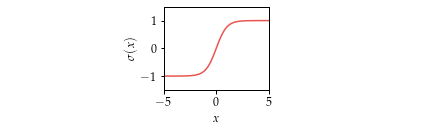

In [11]:
#Activation functions

def sigmoid(x):
    return 1/(1+np.exp(-(x)))

def relu(x):
    return np.maximum(0,x)

def leaky_relu(x):
    return np.maximum(0.05*x,x)

def elu(xx, aa):
    return [aa*(np.exp(x)-1) if x < 0 else x for x in xx]


x = np.linspace(-5,5,100)

fig, axs = triple_wide(height=2, labels=['','',''])

axs[0].set_axis_off()
axs[2].set_axis_off()

axs[1].plot(x, np.tanh(x))


axs[1].set_ylim([-1.5,1.5])
axs[1].set_xlim([-5,5])
axs[1].set_yticks([-1,0,1])
axs[1].set_xticks([-5,0,5])
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$\sigma(x)$")
    
publish_figure("sigmoid.pdf")

https://github.com/millskyle/phd_thesis/raw/main/methods/figs/universal_one.pdf


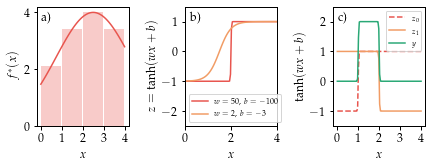

In [151]:
fig, ax = triple_wide()


def f(x):
    return 4*np.exp(-(0.4*x-1)**2)
    
x = np.linspace(0, 4, num=100)
y = f(x)
ax[0].plot(x,y)
ax[0].set_xticks([0, 1, 2, 3, 4])
ax[0].bar(np.arange(4)+0.5, f(np.arange(4)+0.5), width=0.95, alpha=0.3)
ax[0].set_ylabel("$f^{*}(x)$")

ax[1].plot(x, np.tanh(50*x-100), label="$w=50,\ b=-100$")
ax[1].plot(x, np.tanh(2*x-3), label="$w=2,\ b=-3$")
ax[1].set_xlim([0,4])
ax[1].set_ylim([-2.5,1.5])
ax[1].legend(fontsize=8)
ax[1].set_ylabel("$z=\\tanh(wx+b)$")


ax[2].plot(x, np.tanh(50*x-50), '--', label='$z_0$')
ax[2].plot(x, np.tanh(-50*x+100), '-', label='$z_1$')
ax[2].plot(x, np.tanh(50*x-50) + np.tanh(-50*x+100), alpha=1.0, label='$y$')
ax[2].legend(fontsize=8)
ax[2].set_ylim([-1.5,2.5])
ax[2].set_xticks([0,1,2,3,4])
ax[2].set_ylabel("$\\tanh(wx+b)$")


for a in ax:
    a.set_xlabel("$x$")

publish_figure("universal_one.pdf")





https://github.com/millskyle/phd_thesis/raw/main/methods/figs/universal_two.pdf


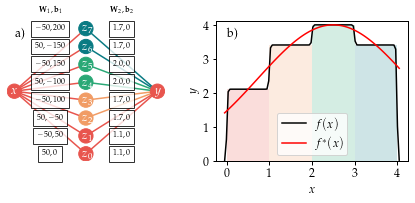

In [416]:
def draw_ann(ax, xy=(0,0), layers=[5,4,1], spacing=None, bounds=None, colors=None, text=None,
            text_offset=None):
    if spacing is None:
        spacing = [2,]*(len(layers)-1)
    if colors is None:
        colors = [None,]*(len(layers))
    p = []
    layer_x = xy[0]
    layer_ys = [xy[1]-0.5*L for L in layers]

    for l,L in enumerate(layers):
        c = colors[l]
        if c is None:
            c = [plt.rcParams['axes.prop_cycle'].by_key()['color'][0]]*layers[l]
        else:
            assert len(c)==layers[l], "Length of specified colours must match the number of nodes in the layer"
        for i in range(layers[l]): #for each node
            p.append(matplotlib.patches.Circle((layer_x,layer_ys[l]+i), 0.4, color=c[i], zorder=100))
            if text is not None:
                if text[l] is not None:
                    if text[l][i] is not None:
                        try:
                            to = text_offset[l]
                            if to is None: to=[0,0]
                        except:
                            to=[0,0]
                            pass
                        ax.text(layer_x+to[0], layer_ys[l]+i+to[1], text[l][i], va='center', ha='center',color='white',zorder=101, )
            if l+1 < len(layers):
                for j in range(layers[l+1]):
                    p.append(matplotlib.lines.Line2D((layer_x, layer_x+spacing[l]),(layer_ys[l]+i, layer_ys[l+1]+j), zorder=10, color=c[i]))
    
        if l+1 < len(layers):
            layer_x += spacing[l]

            
            
    if bounds is None:
        bounds = []
    else:
        bounds = [bounds]
        
    for a in p:
        ax.add_artist(a)
        
        if isinstance(a,matplotlib.lines.Line2D):
            b = a.get_path().get_extents()    
        else:
            b = a.get_extents()
        b = b.transformed(ax.transData.inverted())
        bounds.append([b.x0, b.x1, b.y0, b.y1])
    
    minn = np.min(bounds, axis=0)
    maxx = np.max(bounds, axis=0)
    
    bounds = [minn[0], maxx[1], minn[2], maxx[3] ]
    
    ax.set_xlim(bounds[0:2])
    ax.set_ylim(bounds[2:4])
    
    ax.set_aspect(1)
    return bounds
    

    
## EXAMPLE: 
#fig, ax = plt.subplots(1,1)
#bounds = draw_ann(ax, xy=(1,1), layers=[2,3,4,5,6,1])
#bounds = draw_ann(ax, xy=(1,5), layers=[2,1], bounds=bounds)
#draw_ann(ax, xy=(1,-3), layers=[2,1], bounds=bounds)
#fig.show()

fig, ax = double_wide()

x = np.linspace(-0.05, 4.05, num=100)

mag_W=50
W1 = [mag_W, -mag_W]*4
b1 = [mag_W*0, mag_W] + [-mag_W, mag_W*2] + [-mag_W*2, mag_W*3] + [-mag_W*3, mag_W*4]
y = 0


W2 = [1,1,1,1,1,1,1,1]
W2 = [f(i+0.5)/2. for i in [0,0,1,1,2,2,3,3]]
b2 = [0,0,0,0,0,0,0,0]

for l in range(len(W1)):
    y+=W2[l]*np.tanh(W1[l]*x + b1[l]) + b2[l]


ax[1].plot(x, y, color='black', label="$f(x)$")
ax[1].plot(x, f(x), color='red', label="$f^{*}(x)$")
ax[1].legend()
for i in range(4):
    ax[1].bar(i+0.5,f(i+0.5),width=1.0, alpha=0.2, color=colors[2*i])


c = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = [c[0],c[0],c[1],c[1],c[2],c[2],c[3],c[3]]
bounds = draw_ann(ax[0], xy=(0,0), spacing=[4,4],
                  layers=[1,8,1], colors=[None,colors,None],
                  text=[["$x$"], [f"$z_{{{i}}}$" for i in range(8)], ["$y$"]])

for i in range(8):
    ax[0].text(4-2,-4+i,f"${{{W1[i]}}},{{{b1[i]}}}$", va='center',size=8, ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))

for i in range(8):
    ax[0].text(4+2,-4+i,f"${{{W2[i]:.1f}}},{{{b2[i]}}}$", va='center',size=8, ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))
    
ax[0].text(4-2,-4+8,"$\mathbf{W}_1, \mathbf{b}_1$", va='center',size=8, ha='center', zorder=101) 
ax[0].text(4+2,-4+8,"$\mathbf{W}_2, \mathbf{b}_2$", va='center',size=8, ha='center', zorder=101) 
    
#for i in range(8):
#    ax[0].text(3-1.5,-4+i,ts[i], va='center',size=8, ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))

    
ax[0].set_axis_off()
ax[1].set_ylabel("$y$")
ax[1].set_xlabel("$x$")
ax[1].set_ylim([0,4.1])

publish_figure("universal_two.pdf")







In [306]:
print(list(f(i+0.5) for i in range(4)))

[2.109169696172194, 3.408575155864846, 4.0, 3.408575155864845]


/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/universal_deep.pdf


/home/kmills/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


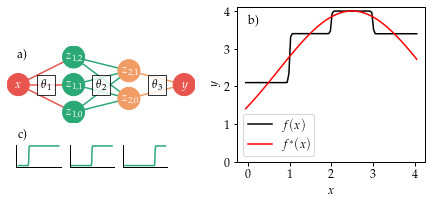

In [458]:
fig, ax = double_wide()

x = np.linspace(-0.05, 4.05, num=100).reshape((-1,1))
y = np.zeros_like(x)

mag_W=50
W1 = np.array([mag_W,mag_W,mag_W]).reshape((1,3))
b1 = np.array([-1*mag_W,-2*mag_W,-3*mag_W]).reshape((3,1))

W2 = np.array([[.34/2-.21/2,0],
               [.4/2-.34/2,0],
               [0.0,.4/2-.34/2]]).reshape((3,2))
b2 = np.array([0,0]).reshape((2,1))


W3 = 2.5*np.array([4.0,-4.0]).reshape((2,1))
b3 = np.array([2.75]).reshape((1,1))



l1_out = np.array([np.tanh( W1.T@x[i].reshape((1,1)) + b1) for i in range(len(x))])


for i in range(len(x)):
    y_ =np.tanh( W1.T@x[i].reshape((1,1)) + b1)
    y_ = np.tanh(W2.T@y_ + b2)
    y_ = W3.T @ y_
    y[i] = y_ + b3
        
ax[1].plot(x, y, color='black', label="$f(x)$")
ax[1].plot(x, f(x), color='red', label="$f^{*}(x)$")
ax[1].legend()


#for i in range(4):
#    ax[1].bar(i+0.5,f(i+0.5),width=1.0, alpha=0.2, color=colors[2*i])


c = plt.rcParams['axes.prop_cycle'].by_key()['color']

bounds = draw_ann(ax[0], xy=(0,0), spacing=[2,2,2],
                  layers=[1,3,2,1],
                  colors=[None, [c[2]]*3, [c[1],c[1]], None],
                  text=[["$x$"], [f"$z_{{1,{{{i}}}}}$" for i in range(3)], [f"$z_{{2,{{{i}}}}}$" for i in range(2)], ["$y$"]])

ax[0].set_axis_off()
ax[1].set_ylabel("$y$")
ax[1].set_xlabel("$x$")
ax[1].set_ylim([0,4.1])

W1 = W1.flatten()
b1 = b1.flatten()

ax[0].text(1, -0.5, "$\\theta_1$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))
ax[0].text(3, -0.5, "$\\theta_2$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))
ax[0].text(5, -0.5, "$\\theta_3$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))

    



subaxs = [fig.add_axes([0.05+i*0.12,0.2,.1,.1]) for i in range(3)]
for i in range(3):
    subaxs[i].plot(x, l1_out[:,i,0], color=c[2])
    subaxs[i].spines['right'].set_visible(False)
    subaxs[i].spines['top'].set_visible(False)
    subaxs[i].set_xticks([])
    subaxs[i].set_yticks([])
    
    
    subaxs[i].set_yticks([])
    
subaxs[0].text(-0.1,1.8,"c)")
    
publish_figure("universal_deep.pdf")    


In [ ]:
## EXAMPLE: 
#fig, ax = plt.subplots(1,1)
#bounds = draw_ann(ax, xy=(1,1), layers=[2,3,4,5,6,1])
#bounds = draw_ann(ax, xy=(1,5), layers=[2,1], bounds=bounds)
#draw_ann(ax, xy=(1,-3), layers=[2,1], bounds=bounds)
#fig.show()

fig, ax = double_wide()

x = np.linspace(-0.05, 4.05, num=100).reshape((-1,1))
y = np.zeros_like(x)

mag_W=50
W1 = np.array([mag_W,mag_W,mag_W,mag_W]).reshape((1,4))
b1 = np.array([-0*mag_W,-1*mag_W,-2*mag_W,-3*mag_W]).reshape((4,1))

W2 = np.array([[0.21/2,0],
               [.34/2-.21/2,0],
               [.4/2-.34/2,0],
               [0.0,.4/2-.34/2]]).reshape((4,2))
b2 = np.array([0,0]).reshape((2,1))


W3 = 2.5*np.array([4.0,-4.0]).reshape((2,1))
b3 = np.array([1.75]).reshape((1,1))



l1_out = np.array([np.tanh( W1.T@x[i].reshape((1,1)) + b1) for i in range(len(x))])


for i in range(len(x)):
    y_ =np.tanh( W1.T@x[i].reshape((1,1)) + b1)
    y_ = np.tanh(W2.T@y_ + b2)
    y_ = W3.T @ y_
    y[i] = y_ + b3
        
ax[1].plot(x, y, color='black', label="$f(x)$")
ax[1].plot(x, f(x), color='red', label="$f^{*}(x)$")
ax[1].legend()


#for i in range(4):
#    ax[1].bar(i+0.5,f(i+0.5),width=1.0, alpha=0.2, color=colors[2*i])


c = plt.rcParams['axes.prop_cycle'].by_key()['color']

bounds = draw_ann(ax[0], xy=(0,0), spacing=[2,2,2],
                  layers=[1,4,2,1],
                  colors=[None, [c[2]]*4, [c[1],c[3]], None],
                  text=[["$x$"], None, None, ["$y$"]])

ax[0].set_axis_off()
ax[1].set_ylabel("$y$")
ax[1].set_xlabel("$x$")


print(l1_out.shape)

subaxs = [fig.add_axes([i*0.12,0,.1,.1]) for i in range(4)]
for i in range(4):
    subaxs[i].plot(x, l1_out[:,i,0], color=c[2])
    subaxs[i].spines['right'].set_visible(False)
    subaxs[i].spines['top'].set_visible(False)
    subaxs[i].set_xticks([])
    subaxs[i].set_yticks([])
    
    
    subaxs[i].set_yticks([])
    
    


In [ ]:
#Activation functions

fig, axs = double_wide()


x = np.linspace(-5,5,100)

axs[0].plot(x, sigmoid(x), label='sigmoid')
axs[0].plot(x, np.tanh(x), label='tanh')
axs[1].plot(-100,100)  #plot two points off axis to cycle the colours
axs[1].plot(-100,100)
axs[1].plot(x, relu(x), label='ReLU')
axs[1].plot(x, elu(x, 1), label='ELU')
axs[1].plot(x, leaky_relu(x), label='Leaky ReLU')

for ax in axs:
    ax.set_ylim([-1.5,1.5])
    ax.set_xlim([-5,5])
    ax.set_yticks([-1,0,1])
    ax.set_xticks([-5,0,5])
    ax.grid(False)
    ax.legend(loc='lower right')
    


publish_figure("activationfunctions.pdf")


